In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv("data.csv")

In [6]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [10]:
df = df.iloc[:,[1,2,3,4,5,6,10,11]]

In [12]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,313000.0,3.0,1.50,1340,7912,1.5,1340,0
1,2384000.0,5.0,2.50,3650,9050,2.0,3370,280
2,342000.0,3.0,2.00,1930,11947,1.0,1930,0
3,420000.0,3.0,2.25,2000,8030,1.0,1000,1000
4,550000.0,4.0,2.50,1940,10500,1.0,1140,800


In [24]:
X = df.iloc[:,1:]

In [28]:
df['price'] = df["price"]/1000

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16348\469067022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df["price"]/1000


In [32]:
y = df["price"]

In [34]:
y

0        313.000000
1       2384.000000
2        342.000000
3        420.000000
4        550.000000
           ...     
4595     308.166667
4596     534.333333
4597     416.904167
4598     203.400000
4599     220.600000
Name: price, Length: 4600, dtype: float64

In [38]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.367570,0.210427
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,0.484705,0.334165
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.689918,0.298020
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.876443,0.447206
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.216455,0.034842
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.522814,-0.255510
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,1.000000,-0.038723
sqft_basement,0.210427,0.334165,0.298020,0.447206,0.034842,-0.255510,-0.038723,1.000000


In [40]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.metrics import r2_score, mean_squared_error

In [42]:
lr = LinearRegression()

In [44]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [46]:
lr.fit(x_train,y_train)

LinearRegression()

In [48]:
y_prid = lr.predict(x_test)

In [52]:
r2_score(y_test,y_prid)

0.027711576275125105

In [70]:
l = Lasso(alpha=100)

In [72]:
l.fit(x_train,y_train)

Lasso(alpha=100)

In [74]:
y_prid1 = l.predict(x_test)

In [76]:
r2_score(y_test,y_prid1)

0.03013610852413684

In [86]:
el = ElasticNet(alpha=10,l1_ratio=0.6)

In [88]:
el.fit(x_train,y_train)

ElasticNet(alpha=10, l1_ratio=0.6)

In [90]:
y_prid2 = el.predict(x_test)

In [92]:
r2_score(y_test,y_prid2)

0.03025884941136825

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.262e+08, tolerance: 5.229e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.194e+08, tolerance: 5.229e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.150e+08, tolerance: 

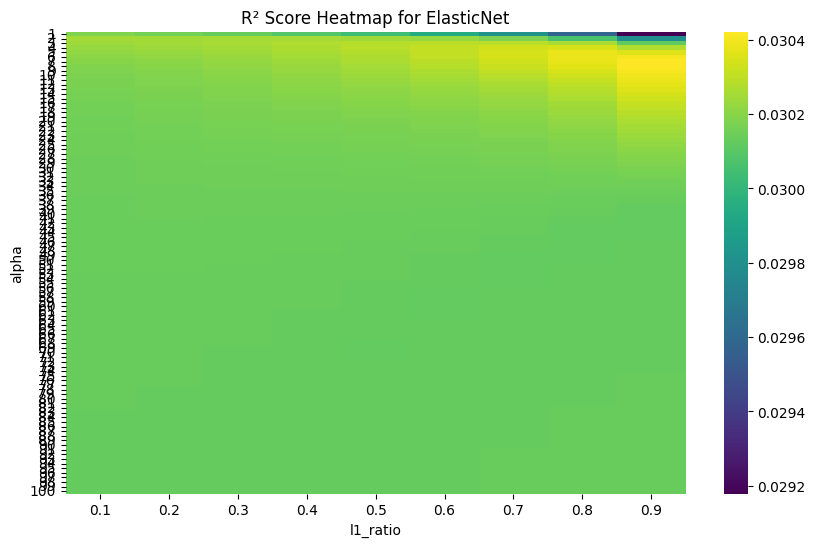

Best R² Score: 0.030421509081921094
Best alpha: 7
Best l1_ratio: 0.9


In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

alpha_range = range(1, 101)
l1_ratio_range = [i / 10 for i in range(1, 10)]

results = np.zeros((len(alpha_range), len(l1_ratio_range)))

# Grid search
for i, alpha in enumerate(alpha_range):
    for j, l1 in enumerate(l1_ratio_range):
        model = ElasticNet(alpha=alpha, l1_ratio=l1, max_iter=10000)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        results[i, j] = r2_score(y_test, y_pred)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(results, xticklabels=l1_ratio_range, yticklabels=list(alpha_range), cmap='viridis', annot=False)
plt.xlabel('l1_ratio')
plt.ylabel('alpha')
plt.title('R² Score Heatmap for ElasticNet')
plt.show()

# Best combination
best_index = np.unravel_index(np.argmax(results), results.shape)
best_alpha = alpha_range[best_index[0]]
best_l1_ratio = l1_ratio_range[best_index[1]]
best_score = results[best_index]

print(f"Best R² Score: {best_score}")
print(f"Best alpha: {best_alpha}")
print(f"Best l1_ratio: {best_l1_ratio}")